# General Transit Feed Specification (GTFS)
## What is GTFS?
The General Transit Feed Specification (GTFS) is an Open Standard used to distribute relevant information about transit systems to riders. It allows public transit agencies to publish their transit data in a format that can be consumed by a wide variety of software applications. Today, the GTFS data format is used by thousands of public transport providers.

More information can be found on the website https://gtfs.org



In [9]:
import pandas as pd # Importing the Pandas package as pd

In [13]:
loc = '/Users/pramesh/Downloads/DMRC_GTFS/' # This is the folder location where the GTFS data is located.

In [61]:
agency = pd.read_csv(loc+'agency.txt')
calendar = pd.read_csv(loc+'calendar.txt')
#calendar_dates_pd = pd.read_csv(loc+'calendar_dates.txt')
routes = pd.read_csv(loc+'routes.txt')
stops = pd.read_csv(loc+'stops.txt')
stop_times = pd.read_csv(loc+'stop_times.txt')
trips = pd.read_csv(loc+'trips.txt')
shapes = pd.read_csv(loc+'shapes.txt')

#### 1. agency.txt

In [15]:
agency.head()

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone,agency_fare_url,agency_email
0,DMRC,Delhi Metro Rail Corporation,http://www.delhimetrorail.com/,Asia/Kolkata,NaN,NaN,NaN,NaN


#### 2. calendar.txt
There are three ```service_id``` - weekday, saturday, and sunday.

In [17]:
calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,weekday,1,1,1,1,1,0,0,20190101,20251231
1,saturday,0,0,0,0,0,1,0,20190101,20251231
2,sunday,0,0,0,0,0,0,1,20190101,20251231


#### 3. routes.txt
There are 36 routes. Route in different direction is counted seperately. 

In [31]:
routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color,route_sort_order,continuous_pickup,continuous_drop_off
0,33,NaN,R_SP_R,RAPID_Phase 3 (Rapid Metro) to Sector 55-56 (R...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
1,31,NaN,G_DD_R,GRAY_Dhansa Bus Stand to Dwarka,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2,29,NaN,P_MS_R,PINK_Shiv Vihar to Majlis Park,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
3,12,NaN,M_JB,MAGENTA_Janak Puri West to Botanical Garden,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,P_MS,PINK_Majlis Park to Shiv Vihar,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
print(f"Total number of routes: {len(routes.index)}")

Total number of routes: 36


#### 4. trips.txt

In [21]:
trips.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,0,weekday,0,NaN,NaN,NaN,NaN,shp_1_30,0,0
1,0,weekday,1,NaN,NaN,NaN,NaN,shp_1_30,0,0
2,0,weekday,10,NaN,NaN,NaN,NaN,shp_1_30,0,0
3,0,weekday,100,NaN,NaN,NaN,NaN,shp_1_30,0,0
4,2,weekday,1000,NaN,NaN,NaN,NaN,shp_1_13,0,0


#### 5. stops.txt

In [32]:
stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon
0,1,NaN,Dilshad Garden,NaN,28.675991,77.321495
1,2,NaN,Jhilmil,NaN,28.675648,77.312393
2,3,NaN,Mansrover park,NaN,28.675352,77.301178
3,4,NaN,Shahdara,NaN,28.673531,77.287270
4,5,NaN,Welcome,NaN,28.671986,77.277931


#### 6. stop_times.txt

In [44]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,continuous_pickup,continuous_drop_off
0,0,05:28:08,05:28:28,21,0,NaN,0,0,0.000,1,NaN,NaN
1,0,05:30:58,05:31:18,20,1,NaN,0,0,1202.405,1,NaN,NaN
2,0,05:33:28,05:33:48,19,2,NaN,0,0,2480.750,1,NaN,NaN
3,0,05:35:33,05:35:53,18,3,NaN,0,0,3314.936,1,NaN,NaN
4,0,05:37:53,05:38:13,17,4,NaN,0,0,4300.216,1,NaN,NaN


#### 7. shapes.txt

In [62]:
shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,shp_1_2,28.615887,77.022461,1,0.000
1,shp_1_2,28.616341,77.022499,2,50.510
2,shp_1_2,28.617985,77.022453,3,233.586
3,shp_1_2,28.618252,77.022453,4,263.487
4,shp_1_2,28.618425,77.022438,5,282.857


### Merging data

In [99]:
A = stop_times.merge(trips, on = "trip_id")
B = A.merge(routes, on = "route_id")
C = B.merge(stops, on="stop_id")
D = C.merge(calendar, on = "service_id")
gtfs = D.merge(shapes, on= "shape_id")
gtfs = gtfs[gtfs['service_id'] == 'weekday']
gtfs = gtfs[['trip_id', 'arrival_time', 'departure_time', 'stop_id', 'stop_sequence',
         'route_id', 'direction_id','route_short_name', 'route_long_name',
       'route_type', 'stop_id', 'stop_name', 'stop_lat', 'stop_lon', 'shape_id', 'shape_pt_lat','shape_pt_lon', 'shape_pt_sequence']]
gtfs.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,route_id,direction_id,route_short_name,route_long_name,route_type,stop_id,stop_name,stop_lat,stop_lon,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,0,05:28:08,05:28:28,21,0,0,NaN,R_RD,RED_Rithala to Dilshad Garden,1,21,Rithala,28.720821,77.105042,shp_1_30,28.720821,77.105042,1
1,0,05:28:08,05:28:28,21,0,0,NaN,R_RD,RED_Rithala to Dilshad Garden,1,21,Rithala,28.720821,77.105042,shp_1_30,28.714983,77.115402,2
2,0,05:28:08,05:28:28,21,0,0,NaN,R_RD,RED_Rithala to Dilshad Garden,1,21,Rithala,28.720821,77.105042,shp_1_30,28.714983,77.115402,3
3,0,05:28:08,05:28:28,21,0,0,NaN,R_RD,RED_Rithala to Dilshad Garden,1,21,Rithala,28.720821,77.105042,shp_1_30,28.707872,77.125687,4
4,0,05:28:08,05:28:28,21,0,0,NaN,R_RD,RED_Rithala to Dilshad Garden,1,21,Rithala,28.720821,77.105042,shp_1_30,28.707872,77.125687,5


In [100]:
gtfs[gtfs['trip_id'] == 0 ]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,route_id,direction_id,route_short_name,route_long_name,route_type,stop_id,stop_name,stop_lat,stop_lon,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,0,05:28:08,05:28:28,21,0,0,NaN,R_RD,RED_Rithala to Dilshad Garden,1,21,Rithala,28.720821,77.105042,shp_1_30,28.720821,77.105042,1
1,0,05:28:08,05:28:28,21,0,0,NaN,R_RD,RED_Rithala to Dilshad Garden,1,21,Rithala,28.720821,77.105042,shp_1_30,28.714983,77.115402,2
2,0,05:28:08,05:28:28,21,0,0,NaN,R_RD,RED_Rithala to Dilshad Garden,1,21,Rithala,28.720821,77.105042,shp_1_30,28.714983,77.115402,3
3,0,05:28:08,05:28:28,21,0,0,NaN,R_RD,RED_Rithala to Dilshad Garden,1,21,Rithala,28.720821,77.105042,shp_1_30,28.707872,77.125687,4
4,0,05:28:08,05:28:28,21,0,0,NaN,R_RD,RED_Rithala to Dilshad Garden,1,21,Rithala,28.720821,77.105042,shp_1_30,28.707872,77.125687,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53500,0,06:18:18,06:18:38,1,20,0,NaN,R_RD,RED_Rithala to Dilshad Garden,1,1,Dilshad Garden,28.675991,77.321495,shp_1_30,28.676060,77.317772,201
53501,0,06:18:18,06:18:38,1,20,0,NaN,R_RD,RED_Rithala to Dilshad Garden,1,1,Dilshad Garden,28.675991,77.321495,shp_1_30,28.676041,77.318619,202
53502,0,06:18:18,06:18:38,1,20,0,NaN,R_RD,RED_Rithala to Dilshad Garden,1,1,Dilshad Garden,28.675991,77.321495,shp_1_30,28.675917,77.320175,203
53503,0,06:18:18,06:18:38,1,20,0,NaN,R_RD,RED_Rithala to Dilshad Garden,1,1,Dilshad Garden,28.675991,77.321495,shp_1_30,28.675865,77.320732,204


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.Graph()
nodePos = {}
colors = []

for r in gtfs['route_id'].unique():
    t = gtfs[gtfs['route_id'] == r]['trip_id'].unique()[0] # Extracting the first trip of every route
    color = gtfs[gtfs['route_id'] == r]['route_long_name'].unique()[0].split("_")[0].split("/")[0]
    if color == "RAPID":
        color = "BLACK"
    sid = gtfs[gtfs['trip_id'] == t]['shape_id'].unique()[0]
    for index, row in shapes[shapes['shape_id'] == sid].iterrows():
        if row['shape_pt_sequence'] == 1:
            tail = row['shape_id'] + "_" + str(row['shape_pt_sequence'])
            nodePos[tail] = (row['shape_pt_lon'], row['shape_pt_lat'])
        else:o
            head = row['shape_id'] + "_" + str(row['shape_pt_sequence'])
            nodePos[head] = (row['shape_pt_lon'], row['shape_pt_lat'])
            g.add_edge(tail, head)
            colors.append(color)
            tail = head
            

NameError: name 'gtfs' is not defined

/var/folders/js/r4kgpm2s3dg7qh0jx5ffvngh0000gn/T/ipykernel_17734/2787062996.py:1: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(g,pos=nodePos, edge_color=colors, node_size=10)


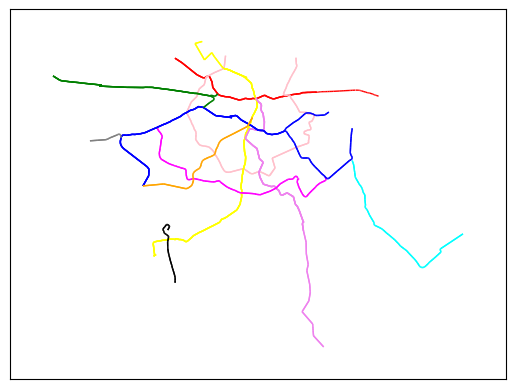

In [139]:
nx.draw_networkx_edges(g,pos=nodePos, edge_color=colors, node_size=10)
plt.savefig(loc+'transitnet.png', dpi=None, facecolor='w')
plt.show()